# 1 -Perkenalan

Nama: Ikhbar Firman Hanafi

Batch: 14

Phase: 1

## Data set
Dataset yang dignakan disini adalah ml_datasets dari database bernama credit_card_default menggunakan google bigquery-public-data.

Adapun proses query data sebagai berikut:

SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month

FROM `bigquery-public-data.ml_datasets.credit_card_default` 

LIMIT 27832;

## Detail deskripsi kolom data

- limit_balance: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- sex: Gender (1=male, 2=female)
- education_level: Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- marital_status: Marital status (1=married, 2=single, 3=others)
- age: Age in years
- pay_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- pay_2 : Repayment status in August, 2005 (scale same as above)
- pay_3 : Repayment status in July, 2005 (scale same as above)
- pay_4 : Repayment status in June, 2005 (scale same as above)
- pay_5 : Repayment status in May, 2005 (scale same as above)
- pay_6 : Repayment status in April, 2005 (scale same as above)
- bill_amt: Amount of bill statement in April-September(from 6 to 1), 2005 (NT dollar)
- pay_amt: Amount of previous payment in April-September(from 6 to 1), 2005 (NT dollar)
- default_payment_next_month: Default payment (1=yes, 0=no)

## Objective
Membuat prediksi kelas `default_payment_next_month`.

# 2 - Import Libraries

Import libraries yang diperlukan

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# 3 - Data Loading

Load dataset ke dalam DataFrame

In [118]:
data = pd.read_csv('h8dsft_P1M1_ikhbar_firman.csv')
data.head() #Menampilkan 5 baris awal data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0


In [119]:
data.tail() #Menampilkan 5 baris terakhir pada data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Dari info di atas, features data semua termasuk numerical dengan jumlah 23 features dan terdapat 2965 baris data points, dimana terdapat feature categorical yang berupa integer yaitu sex, education_level, marital_status, dan pay features. Dari info tersebut juga blm terdeteksi missing values (NaN).

Berikutnya kita akan coba cek value pada feature categorical numeric tersebut (sex,education_level,marital_status,dan pay)

In [121]:
cat_cols = ['sex','education_level','marital_status','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6',]
for col in cat_cols:
    print(col,data[col].unique())

sex [1 2]
education_level [1 2 3 5 4 6 0]
marital_status [2 1 3 0]
pay_0 [ 0 -1  2  1  3 -2  4  5  6  7  8]
pay_2 [ 0  2 -2  3  4  5  6  7  1 -1]
pay_3 [ 0  2 -1 -2  3  5  6  7  4]
pay_4 [ 0  2 -1  3  5 -2  4  6  7  8]
pay_5 [ 0  2  3  4 -1 -2  5  6  7]
pay_6 [ 0  2 -2 -1  3  4  6  7]


Dari unique value features di atas, terdapat beberapa value yang aneh pada feature education_level dan marital_status.

Apabila kita amati keterangan pada feature education_level:
- 1=graduate school
- 2=university
- 3=high school
- 4=others
- 5=unknown
- 6=unknown)

Namun terlihat terdapat value 0,5, dan 6, dimana 5 dan 6 dinyatakan 'unknown'  dan 4 adalah 'others'. Maka value 0,4,5,6 akan kita masukkan ke golongan 'others' dengan replace value menjadi 4.

In [122]:
data['education_level'].replace(to_replace=[0,5,6], value=4, inplace=True)
data['education_level'].value_counts()

2    1400
1    1039
3     483
4      43
Name: education_level, dtype: int64

Berikutnya kita coba amati pada feature marital_status, dimana:
- 1=married
- 2=single
- 3=others

Namun terdapat value 0 pada marital_status, hal ini serupa dengan permasalahan di feature education_level. Kita akan masukkan value 0 dalam golongan 'others' dengan mengganti menjadi value 3.

In [123]:
data['marital_status'].replace(to_replace=0, value=3, inplace=True)
data['marital_status'].value_counts()

2    1594
1    1332
3      39
Name: marital_status, dtype: int64

Selanjutnya kita coba amati features 'pay'.

In [124]:
pay_feats = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
data[pay_feats].describe()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637
std,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000


Terlihat max value pay features adalah 8, maka tidak terdapat payment delay untuk 9 bulan ke atas pada data dan tidak terdapat value yang tidak sesuai dengan kriteria data.

Untuk mempermudah berbagai proses selanjutnya, kita akan mengganti nama kolom target output 'default_payment_next_month' menjadi 'dpnm'.

In [125]:
data.rename(columns={'default_payment_next_month':'dpnm'}, inplace=True)

# 4 - Exploratory Data Analysis (EDA) 

Pertama kita akan coba melihat value limit_balance terhadap target dpnm.

Text(0.5, 1.0, 'Limit balance and Default payment next month')

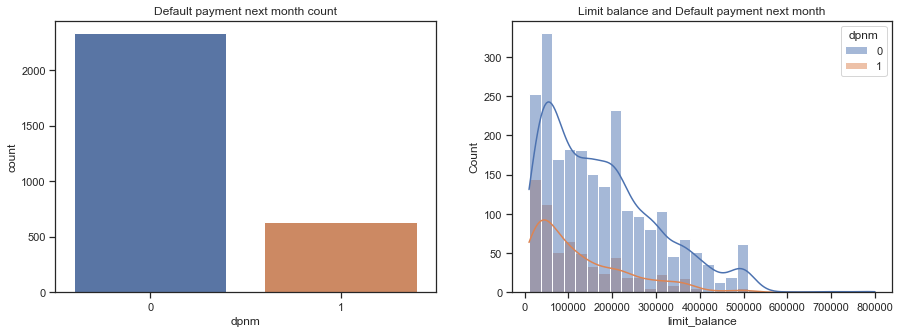

In [126]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='dpnm',data=data)
plt.title('Default payment next month count')

plt.subplot(1,2,2)
sns.histplot(x='limit_balance', hue='dpnm',data=data, kde=True, bins=30, stat='count')
plt.title('Limit balance and Default payment next month')

Dari diagram di atas, kita bisa melihat bahwa yang mendapati default payment 1 semakin sedikit pada orang yang memiliki limit balance yang besar, selain itu data dengan value 1 default payment lebih sedikit dibanding value 0, maka dataset kita termasuk 'imbalanced'. Karena jumlah value 0 jauh lebih banyak dibanding value 1 dpnm, maka kita agak sulit untuk membandingkan distribusi dari frekuensi kedua histogram. Untuk lebih jelasnya kita akan bandingkan hitogram dpnm value 0 dan 1 berdasarkan desnsitynya.


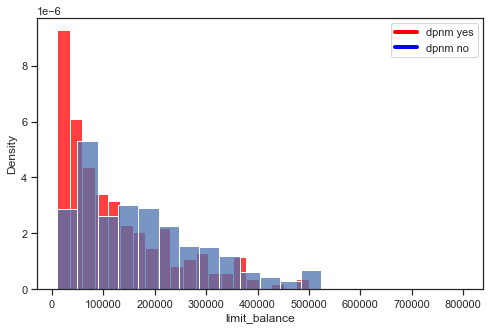

In [127]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.histplot(x = data[data['dpnm'] == 1]['limit_balance'], bins=20,stat='density', color='red')
sns.histplot(x = data[data['dpnm'] == 0]['limit_balance'], bins=20,stat='density')
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4)]
ax.legend(custom_lines, ['dpnm yes','dpnm no'])
plt.show()

Dari grafik di atas lebih tampak jelas bahwa orang dengan default payment memiliki proporsi yang besar pada limit balance yang rendah.

Berikutnya kita akan coba tinjau value age berdasarkan target output dpnm.

Text(0.5, 1.0, 'Dpnm no')

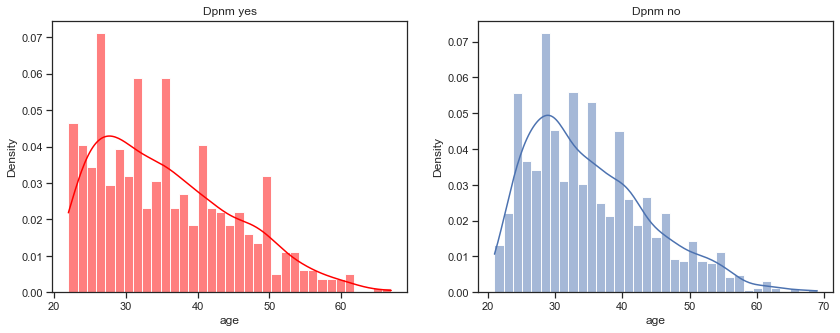

In [128]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(x='age',data=data[data['dpnm'] == 1],bins=35, stat='density',kde=True,color = 'red')
plt.title('Dpnm yes')

plt.subplot(1,2,2)
sns.histplot(x='age',data=data[data['dpnm'] == 0],bins=35, stat='density',kde=True)
plt.title('Dpnm no')

Tidak begitu tampak suatu perbedaan antara kedua distribusi age untuk dpnm 1 maupun age untuk dpnm 0. Kita coba tinjau age dengan feature sex dan berdasarkan target dpnm.

Text(0.5, 1.0, 'Sex and dpnm count')

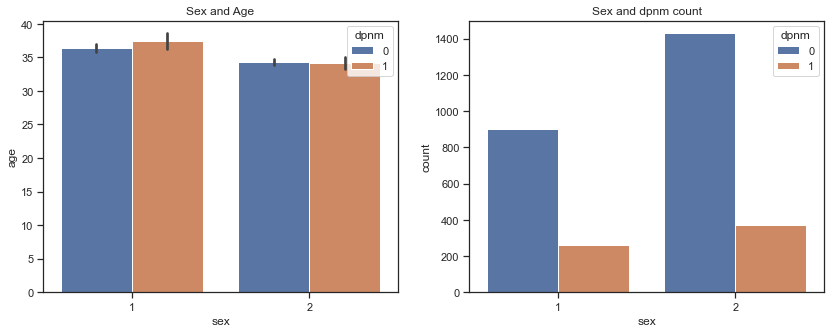

In [129]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(x = 'sex',y='age',data=data,hue='dpnm', estimator=np.mean)
plt.title('Sex and Age')

plt.subplot(1,2,2)
sns.countplot(x = 'sex',data=data,hue='dpnm')
plt.title('Sex and dpnm count')

Dari gambar di atas, tidak terlihat perbedaan mean age pada female (sex=2) baik dengan dpnm 0 dan 1, sedangkan mean age male dengan value dpnm 1 sedikit lebih besar daripada value dengan dpnm 0.

Tidak terdapat perbedaan yang signifikan antara jumlah male dan female yang mendapati default paymnet next month, selain itu proporsi female dengan value 0 dpnm jauh lebih besar dibanding value 1 dpnm.

Selanjutnya kita akan coba melihat value education_level terhadap dpnm dan feature lainnya.

([<matplotlib.axis.XTick at 0x2060843eca0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

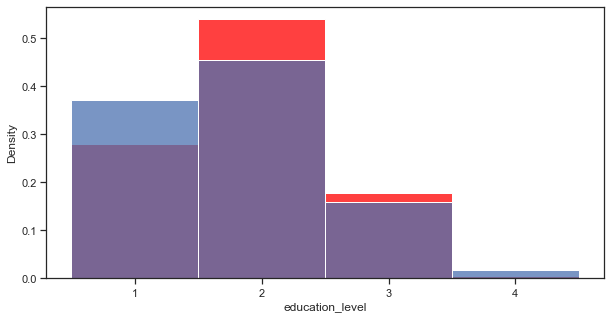

In [130]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'education_level',data=data[data['dpnm'] == 1],discrete=True,stat='density', color = 'red')
sns.histplot(x = 'education_level',data=data[data['dpnm'] == 0], discrete=True,stat='density')
plt.xticks([1,2,3,4])

Dapat dilihat bahwa orang terbanyak yang mendapati default payment next month berada di category 2 education (university), perlu diingat juga proporsi terbesar dari dataset adalah orang dengan education category university juga. Berikutnya kita akan coba tinjau education level dengan mean limit balance berapa pada yang mendapati default payment maupun yang tidak.

<AxesSubplot:xlabel='education_level', ylabel='limit_balance'>

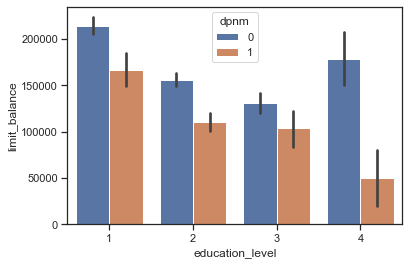

In [131]:
sns.barplot(x = 'education_level', y = 'limit_balance', data=data, hue = 'dpnm')

Dari gambar di atas kita melihat bahwa, semakin tinggi education level maka semakin rendah mean limit balance untuk yang mendapati default payment next month, sedangkan pada orang yang tidak mendapati default payment next month tidak terlihat suatu pattern yang jelas antara education level dan jumlah limit balance nya.

Kita akan melakukan hal yang sama dengan meninjau feature marital_status.

<AxesSubplot:xlabel='marital_status', ylabel='limit_balance'>

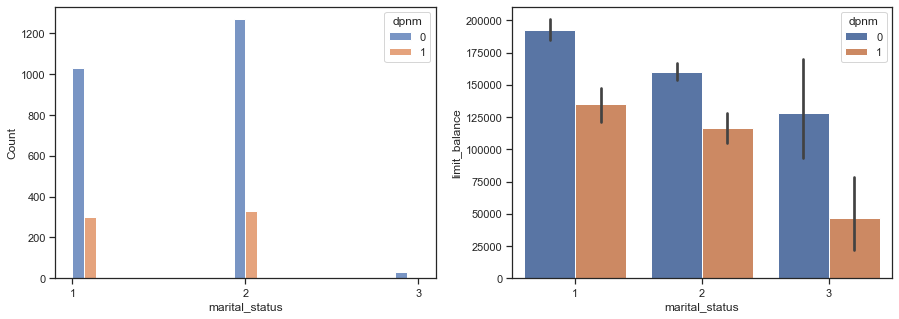

In [132]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x = 'marital_status', hue='dpnm',data=data, multiple='dodge')
plt.xticks([1,2,3])

plt.subplot(1,2,2)
sns.barplot(x = 'marital_status', y = 'limit_balance', data=data, hue = 'dpnm')

Terlihat bahwa jumlah orang yang mendapat default payment next month dengan status married (marital_status = 1) dan status single tidak jauh berbeda. Selain itu mean limit balance dengan marital status married lebih besar dibanding status single baik yang mendapati default payment next month maupun yang tidak.

array([[<AxesSubplot:title={'center':'pay_0'}>,
        <AxesSubplot:title={'center':'pay_2'}>],
       [<AxesSubplot:title={'center':'pay_3'}>,
        <AxesSubplot:title={'center':'pay_4'}>],
       [<AxesSubplot:title={'center':'pay_5'}>,
        <AxesSubplot:title={'center':'pay_6'}>]], dtype=object)

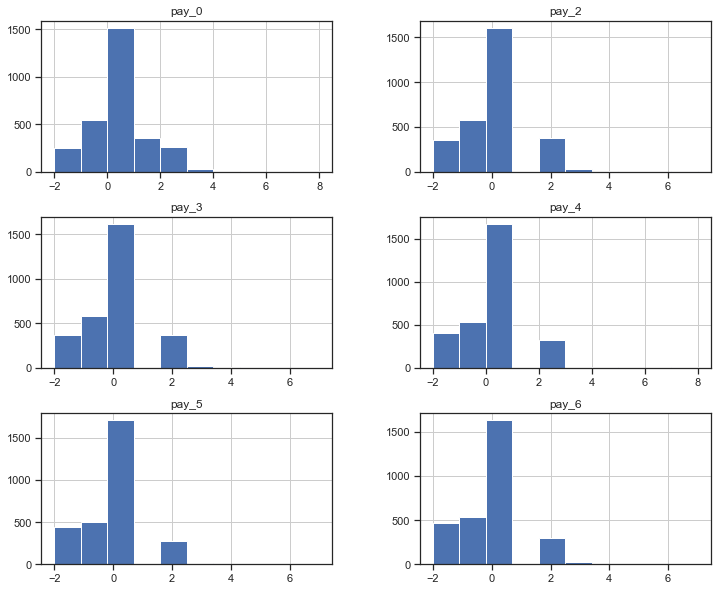

In [133]:
data[pay_feats].hist(figsize=(12,10))

Apabila kita perhatikan pada feature July (pay_3) and August (pay_2). Di bulan July terdapat sedikit orang yang dengan 1 bulan delay payment. Namun di bulan Agustus, tiba-tiba terdapat banyak orang dengan 2 bulan payment delay. Hal ini agak kurang masuk akal, dimana seharusnya jumlah orang dengan delay payment 2 bulan di pada suatu bulan haruslah lebih kecil atau sama dengan jumlah orang dengan 1 bulan payment delay pada bulan sebelumnya. Hal ini haruslah diperiksa kembali terkait detail pengumpulan data. Dari hal ini nampaknya hanya feature pay_0 (bulan terakhir) yang paling representatif dalam target dpnm dari semua payment features.

Selanjutnya kita akan coba cek feature bill_amt dan pay_amt.

array([[<AxesSubplot:title={'center':'bill_amt_1'}>,
        <AxesSubplot:title={'center':'bill_amt_2'}>],
       [<AxesSubplot:title={'center':'bill_amt_3'}>,
        <AxesSubplot:title={'center':'bill_amt_4'}>],
       [<AxesSubplot:title={'center':'bill_amt_5'}>,
        <AxesSubplot:title={'center':'bill_amt_6'}>]], dtype=object)

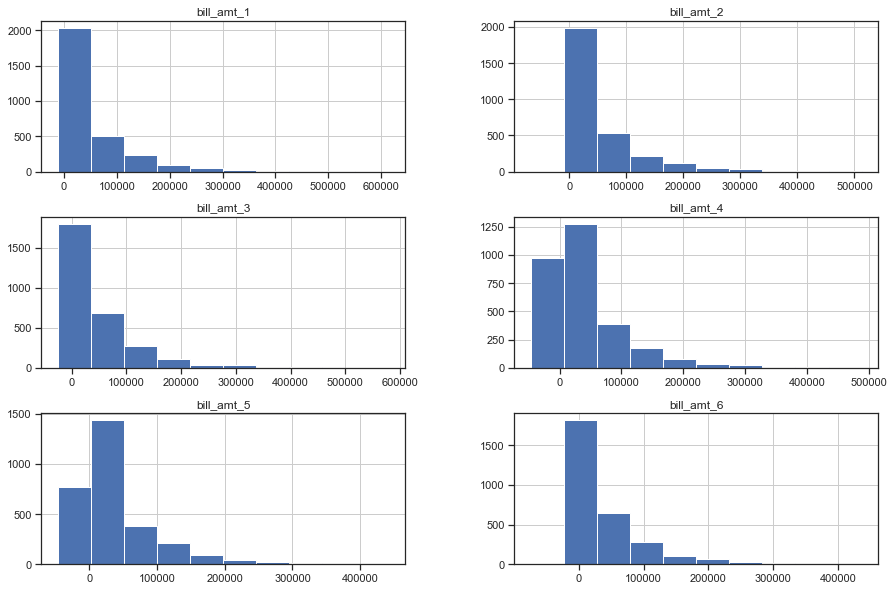

In [134]:
data[['bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']].hist(figsize=(15,10))

array([[<AxesSubplot:title={'center':'pay_amt_1'}>,
        <AxesSubplot:title={'center':'pay_amt_2'}>],
       [<AxesSubplot:title={'center':'pay_amt_3'}>,
        <AxesSubplot:title={'center':'pay_amt_4'}>],
       [<AxesSubplot:title={'center':'pay_amt_5'}>,
        <AxesSubplot:title={'center':'pay_amt_6'}>]], dtype=object)

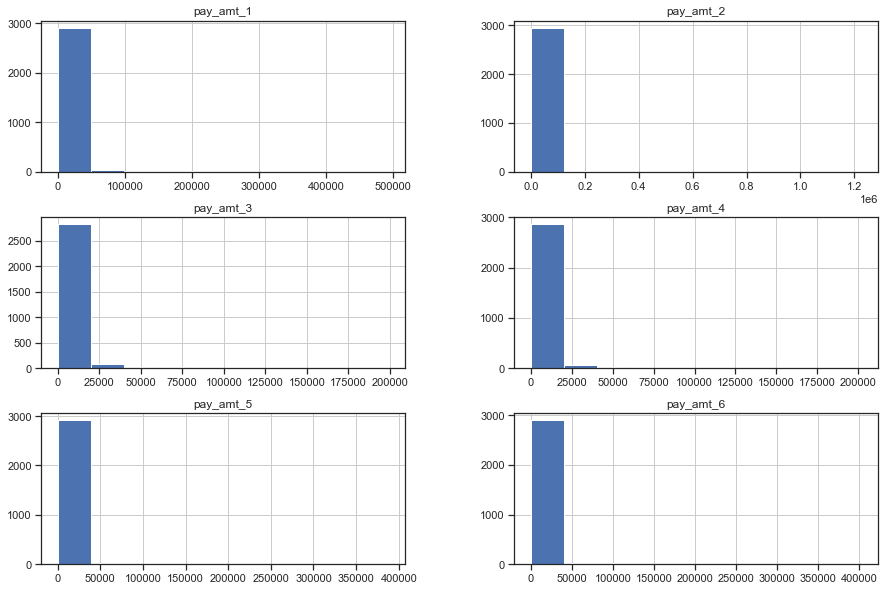

In [135]:
data[['pay_amt_1','pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']].hist(figsize=(15,10))

Baik dari grafik bill_amt dan pay_amt tidak terdapat suatu kejanggalan. Berikutnya kita akan coba cek korelasi antar feature data.

<AxesSubplot:>

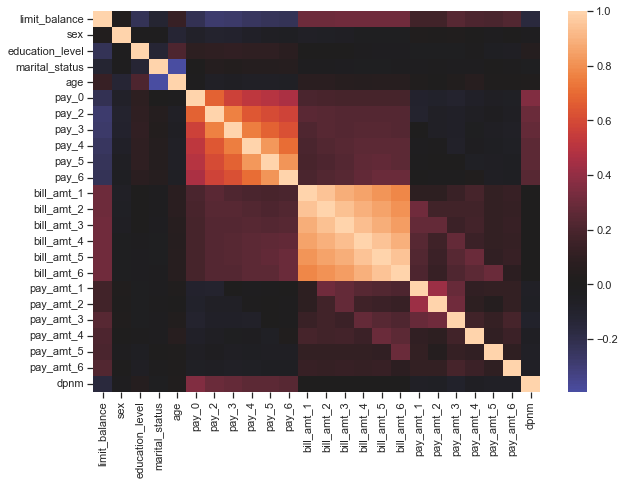

In [136]:
cor = data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor,center = 0)

Terlihat pada pay features dan bill_amt features masing-masing memiliki korelasi, yang mana hal tersebut masuk akal mengingat pay_2 features tentu bergantung pada bulan sebelumnya pay_3 begitu pula pada bill_amt. Dari sekian features tersebut nampak pay_0 memiliki warna yang berbeda (korelasi yang lebih kuat) dibanding pay features bulan-bulan sebelumnya. Hal tersebut cukup masuk akal mengingat terdapat kejanggalan pada beberapa payy features, dan pay_0 (bulan) terakhir yang memang paling representatif terhadap dpnm. selain itu feature limit_bal juga memiliki korelasi yang kuat dan negative terhadap target dpnm yang sebagaimana sudah kita lihat pada histogram limit balance sebelumnya.

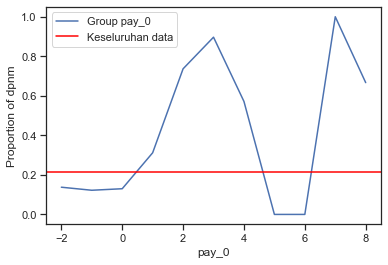

Mean dpnm: 0.21416526138279932


In [137]:
plt.plot(data[['dpnm','pay_0']].groupby('pay_0').mean(), label= 'Group pay_0')
plt.axhline(data['dpnm'].mean(),color = 'red',label='Keseluruhan data')
plt.ylabel('Proportion of dpnm')
plt.xlabel('pay_0')
plt.legend()
plt.show()
print('Mean dpnm:',data['dpnm'].mean())

Telah kita ketahui bahwa orang yang mendapati default pada bulan sebelumnya cenderung juga akan default lagi bulan berikutnya. Berdasarkan grafik tersebut nampak bahwa value pay_0 berkaitan dengan target value dpnm.

# 5 - Data Preprocessing

## Feature Selection

Berdasarkan exploratory data analysis (EDA) dan personal judgement sebelumnya, telah diputuskan beberapa features yang sekiranya tidak mempunyai hubungan yamg kuat dalam prediksi target default payment next month, yaitu:
- sex
- pay features selain pay_0

Oleh karenanya, feature tersebut akan kita remove dalam analisis lebih lanjut.

In [138]:
feat_list = data.columns.tolist()
feat_remove = ['sex','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
features = [i for i in feat_list if i not in feat_remove]
print(features)

['limit_balance', 'education_level', 'marital_status', 'age', 'pay_0', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'dpnm']


In [139]:
data = data[features]

## Get Data for Model Inference

In [140]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state=17)
data_inf

,limit_balance,education_level,marital_status,age,pay_0,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,dpnm
91,420000,2,2,32,0,211688,205003,203118,198925,175684,164037,7300,8839,8000,5900,6000,6000,0
325,30000,2,2,25,2,10343,11069,12082,12473,12623,27460,1200,1201,592,500,1500,0,1
47,40000,3,1,60,0,14019,15780,18519,21058,8204,9899,2000,3000,3000,6000,2000,2000,0
1488,70000,3,3,39,0,34244,32193,10803,15133,3148,4699,3000,11000,5000,3150,2000,4000,0
446,60000,2,2,24,-1,9970,7699,9479,10213,10000,11832,1020,9479,1000,200,1832,5889,0
567,300000,1,1,30,0,93738,84636,88446,76244,67747,70389,3000,5000,2500,2500,3500,87000,1
1473,500000,1,2,43,0,504644,512650,0,3887,0,7413,22650,0,3887,0,7413,0,1
548,490000,2,1,30,0,26088,24092,24488,16995,-1527,62491,2003,2041,1092,4,64895,3003,0
1768,80000,1,2,26,1,40029,41095,40137,40793,42990,42854,2000,0,1603,3000,2000,1056,0
1781,130000,2,1,34,2,28967,30776,33071,32336,34186,34588,2500,3000,0,2600,1000,1500,1


Berikutnya kita akan remove titik point data inference dari dataset df yang akan menjadi data untuk train dan test.

In [141]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,limit_balance,education_level,marital_status,age,pay_0,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,dpnm
0,50000,1,2,39,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,1,2,29,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,2,36,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,45,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,2,24,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,1,39,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,1,1,41,2,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,2,28,1,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,2,1,53,1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1


Kita akan reset index untuk data_train_test, dan data_inf.

In [142]:
# Reset Index 

data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)

## Splitting between **X** (Features) and **y** (Target)

Disini kita akan memisahkan data antara features **X** dengan target output **y**.

In [143]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('dpnm', axis=1) 
y = data_train_test['dpnm']
X

,limit_balance,education_level,marital_status,age,pay_0,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,2,39,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000
1,110000,1,2,29,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000
2,270000,1,2,36,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0
3,130000,1,1,45,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
4,50000,1,2,24,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,210000,2,1,39,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664
2951,280000,1,1,41,2,280,6852,486,0,0,244,6859,486,0,0,244,0
2952,80000,1,2,28,1,0,47,207,0,0,0,47,207,0,0,0,0
2953,200000,2,1,53,1,0,2920,0,0,0,6753,2920,0,0,0,6753,0


## Split between Train-Set and Test-Set

Kita akan split data menjadi data train dan data test, dengan porsi 20% untuk data test dan 80% untuk data train.

In [144]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2364, 17)
Test Size  :  (591, 17)


Karena pada data sebelumnya tidak ditemukan missing values, maka selanjutnya kita akan coba cek outliers pada data train.

## Handling Outliers

Kita akan coba cek outliers untuk numerical features (bukan category seperti sex, education_level, martial_status, dan pay_0).

In [145]:
num_cols = ['limit_balance','age','bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5',
       'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4',
       'pay_amt_5', 'pay_amt_6']

Kita coba lihat grafik distribusi untuk tiap features tersebut, apakah terdapat outliers atau tidak.

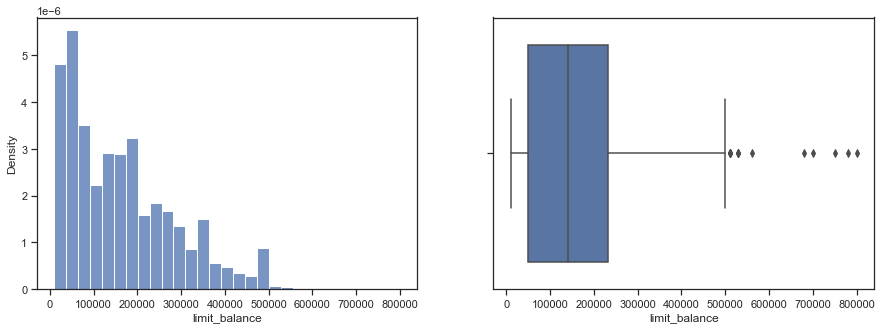

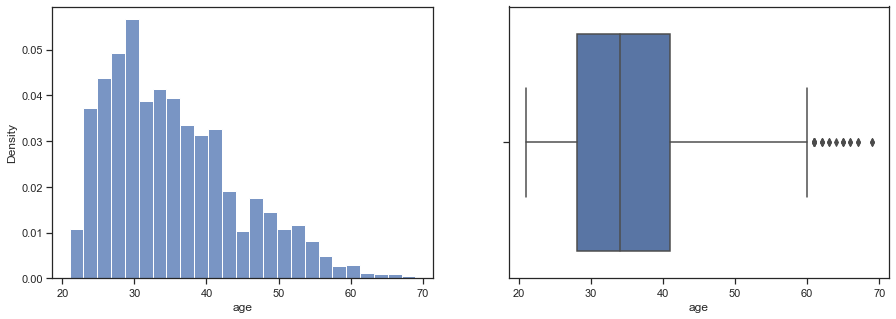

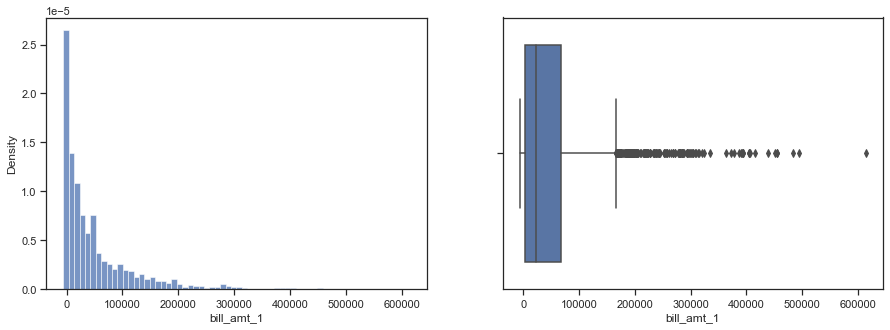

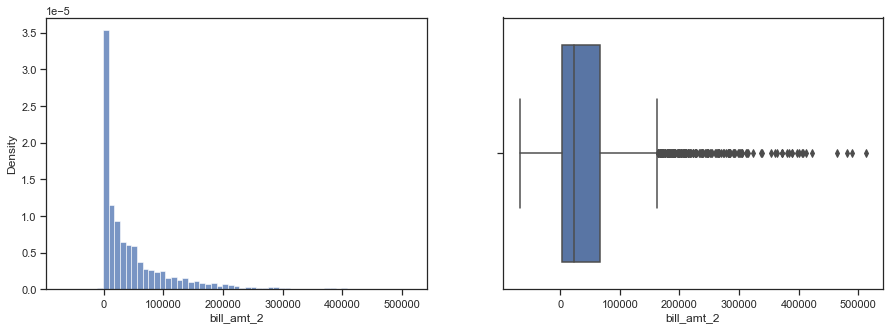

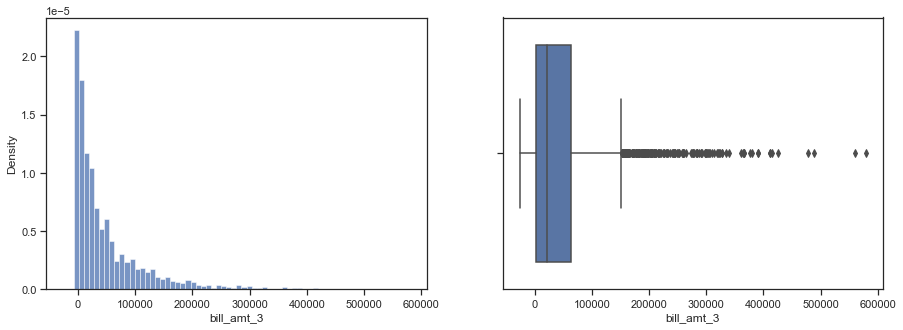

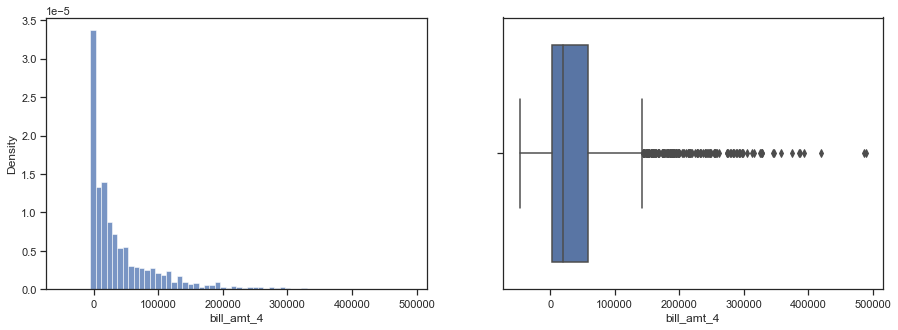

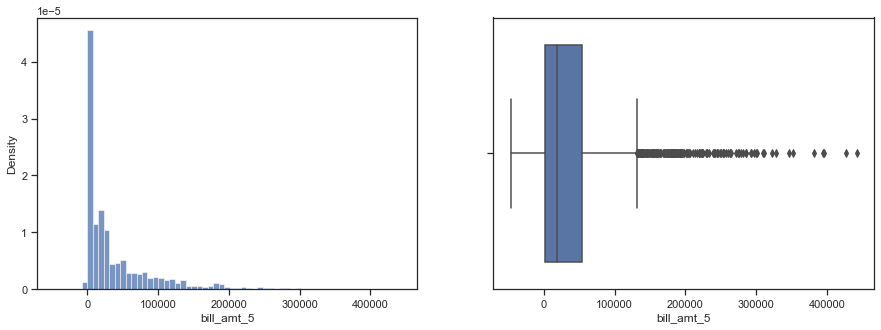

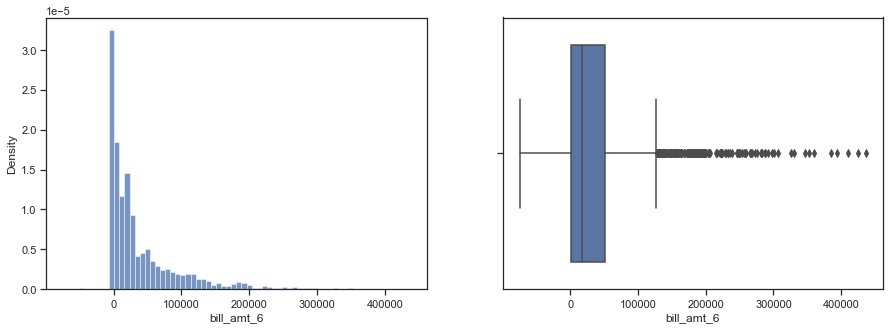

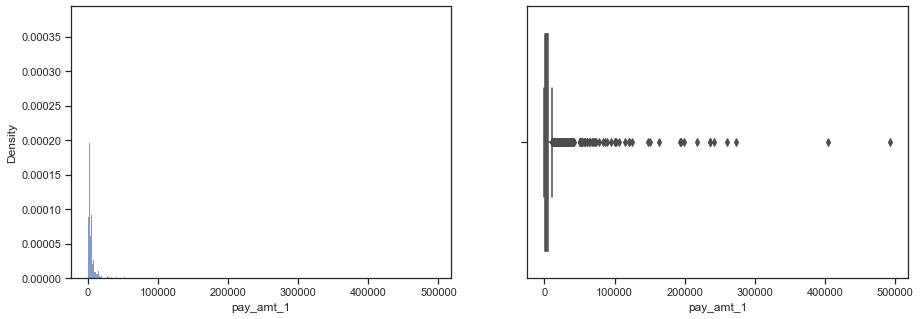

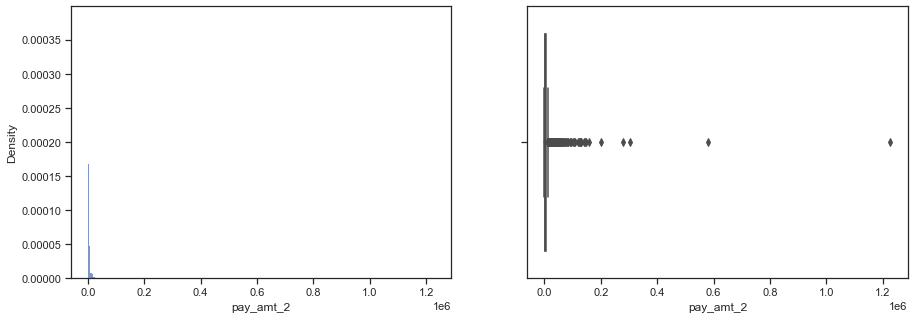

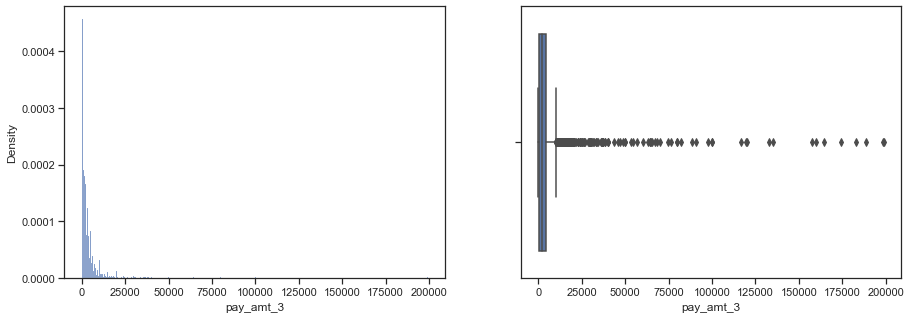

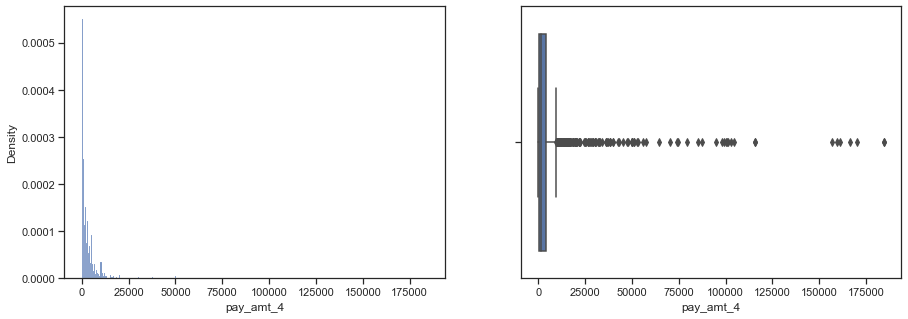

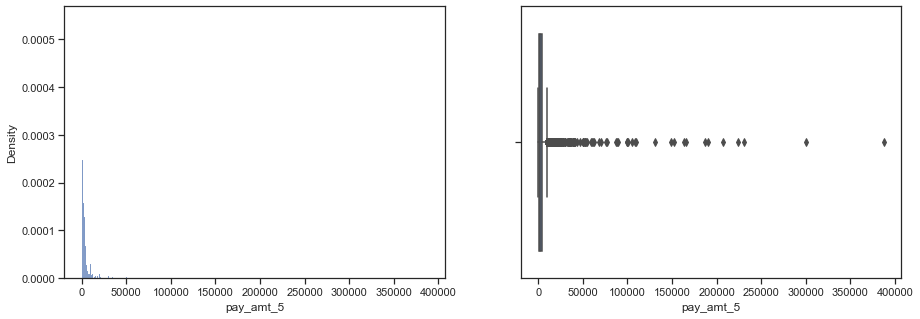

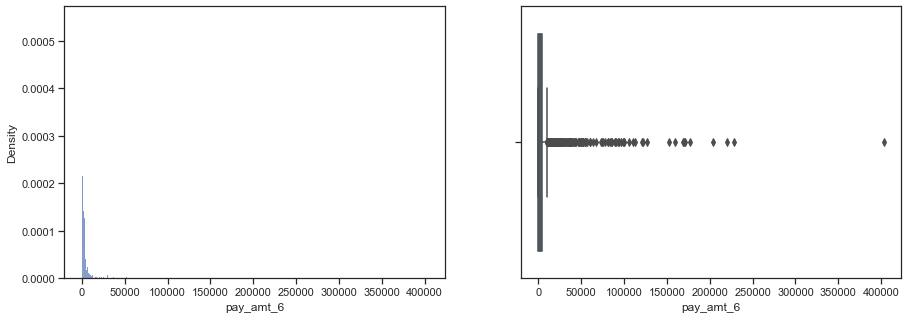

In [146]:
for col in num_cols:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(x = col, data = X_train, stat='density')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=X_train)
    plt.show()

Terdapat banyak sekali outliers (berdasarkan boxplot) pada bill_amt dan pay_amt features. Kita juga bisa melihat batas atas dan bawah outliers dengan function berikut.

In [147]:
def find_outliers(data,variable, distance):
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)
    upper_bound = data[variable].quantile(0.75) + distance*IQR
    lower_bound = data[variable].quantile(0.25) - distance*IQR
    upper_rate = round(np.sum(data[variable] >= upper_bound)/len(data),2)
    lower_rate = round(np.sum(data[variable] <= lower_bound)/len(data),2)
    return upper_bound, upper_rate, lower_bound, lower_rate

In [148]:
for col in num_cols:
    print(col, find_outliers(X_train,col, 1.5))

limit_balance (506250.0, 0.01, -223750.0, 0.0)
age (60.5, 0.01, 8.5, 0.0)
bill_amt_1 (165590.0, 0.08, -93532.0, 0.0)
bill_amt_2 (162501.375, 0.07, -92505.625, 0.0)
bill_amt_3 (152380.875, 0.08, -86216.125, 0.0)
bill_amt_4 (143015.625, 0.07, -81853.375, 0.0)
bill_amt_5 (131727.75, 0.08, -76316.25, 0.0)
bill_amt_6 (127843.75, 0.08, -74640.25, 0.0)
pay_amt_1 (11189.375, 0.09, -5113.625, 0.0)
pay_amt_2 (11031.75, 0.09, -5052.25, 0.0)
pay_amt_3 (10145.5, 0.09, -5416.5, 0.0)
pay_amt_4 (9551.5, 0.09, -5252.5, 0.0)
pay_amt_5 (9664.375, 0.1, -5394.625, 0.0)
pay_amt_6 (10048.25, 0.08, -5787.75, 0.0)


Terdapat 10% data yang terdeteksi outliers (distance 1.5) untuk tiap pay_amt features. Tentu kita akan kehilangan banyak data apabila kita remove outliers tersebut. Dan bisa saja outliers pada pay_amt features tersebut bukan merupakan error input data berpengaruh terhadap penentuan default payment next month. Mengingat feature limit_balance memiliki korelasi yang cukup besar dibanding yang lainnya, maka disini kita akan remove outliers pada feature limit_balance saja.

In [149]:
outliers = X_train['limit_balance'] > 500000

In [150]:
#Membuat data baru yang telah diremove outliers
X_train_ready = X_train[~outliers]
y_train_ready = y_train[~outliers]

In [151]:
len(X_train) -len(X_train_ready)

13

Terdapat 13 data yang telah kita remove berdasarkan outliers feature limit_balance.

## Handling Imbalanced Data

Selanjutnya kita akan melakukan oversampling dan juga undersampling menggunakan SMOTENC (karena terdapat categorical feature) dan RandomUnderSampler untuk membuat data menjadi balance.

In [152]:
over = SMOTENC(categorical_features=[1,2,4],sampling_strategy=0.6, random_state= 27)
under = RandomUnderSampler(sampling_strategy=0.95, random_state=27)
X_train_balance,y_train_balance = over.fit_resample(X_train_ready,y_train_ready)
X_train_balance2,y_train_balance2 = under.fit_resample(X_train_balance,y_train_balance)

## Feature Scaling dan Encoding

Selanjutnya kita akan melakukan feature scaling pada data train yang sudah kita remove outliers. Feature marital_status dan pay_0 merupakan nominal category, oleh karena itu kita akan encoding dengan OneHotEncoder. Perlu diperhatikan bahwa pada feature education_level merupakan ordinal category yang sudah dalam bentuk numeric sesuai tingkatannya, namun belum jelas bahwa value education tersebut akan sesuai dalam prediksi default payment, oleh karena itu feature tersebut juga akan disamakan encoding dengan OneHotEncoder. Sedangkan untuk numerical features lainnya kita akan gunakan MinMaxScaler, dikarenakan distribusi yang beragam pada tiap features dan terdapat outlliers.

In [153]:
#Split numerical and category features
cat_cols = ['education_level','marital_status','pay_0']
num_cols = ['limit_balance','age','bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5',
       'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4',
       'pay_amt_5', 'pay_amt_6']

Kita encoding category dan feature scaling numerical features dapat dilakukan secara bersamaan, maka kita akan gabungkan dengan ColumnTransfomer sebagai berikut.

In [154]:
preprocess = ColumnTransformer([
    ('pipeline_numerical', MinMaxScaler(), num_cols),
    ('pipeline_category', OneHotEncoder(), cat_cols)
])

In [155]:
# Hasil dari scaling dan encoding pada X_train yang sudah dihilangkan outliers
X_train_ready2 = preprocess.fit_transform(X_train_balance2)
X_test_ready = preprocess.transform(X_test)
y_train_ready2 = y_train_balance2

# 6 - Model Definition

Kita akan menerapkan 7 model yang berbeda untuk memprediksi target output default paymen next month (dpnm), yaitu:
- Logistic Regression
- Support Vector Classification (SVC)
- Decision Tree
- Random Forest
- K-Nearest Neighbors (KNN)
- Naive Bayes
- XGBoost Classifier

## Model testing without tuning hyperparameter

Pertama kita tidak akan set atau tuning hyperparameter dari masing-masing model tersebut. Kita akan coba cek hasil mean dan standard deviation f1 score dengan menerapkan cross validation pada data train yang sudah dilakukan feature scaling dan encoding. Adapun dipilih f1 score adalah karena data yang dimiliki merupakan imbalanced data(meskipun telah dilakukan resample), maka dirasa pengukuran precision(positive predictive value) dan recall (true positive rate) harus dijadikan bahan pertimbangan, maka f1 score yang merupakan harmonic mean dari precision dan recall dirasa cocok dalam kasus ini.

Untuk mempermudah kita akan gunakan function berikut untuk melihat mean dan std f1 score dari proses cross validation.

In [156]:
def evaluate_model(X,y,cv, model):
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
	# return scores
	return scores.mean(), scores.std()

In [157]:
# List of model
models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(),
            KNeighborsClassifier(), GaussianNB(), XGBClassifier()]

Untuk cross validation spliting strategy, kita akan gunakan RepeatedStratifiedKFold sebagai berikut.

In [158]:
cv_ = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=27)

Cek mean dan std f1 score dari tiap model.

In [159]:
for model in models:
    cv_mean = evaluate_model(X_train_ready2,y_train_ready2,cv_,model)[0]
    cv_std = evaluate_model(X_train_ready2,y_train_ready2,cv_,model)[1]
    print(f'{model} mean: {cv_mean} and standard deviation: {cv_std}')

LogisticRegression() mean: 0.6344111428214858 and standard deviation: 0.032389961110893525
SVC() mean: 0.6632705075204116 and standard deviation: 0.03685833471263207
DecisionTreeClassifier() mean: 0.7176062017773351 and standard deviation: 0.0288252832174125
RandomForestClassifier() mean: 0.8079602397922572 and standard deviation: 0.03276811135371023
KNeighborsClassifier() mean: 0.7336840384535535 and standard deviation: 0.022738924016558314
GaussianNB() mean: 0.5034045809005407 and standard deviation: 0.05591346693194627
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=N

Berdasarkan mean dan standard deviation dan parameter yang terkandung dalam model tersebut, dipilih model **Random Forest Classifier** sebagai model terbaik. Dikarenakan mean f1 score cross validation Random Forest adalah yang terbesar yaitu sekitar 0.80, dengan standard deviation cukup kecil. Maka kita akan coba terapkan dan tuning model tersebut.

## Define and Set Model

Model yang dipilih adalah Random Forest, dimana kita akan atur value parameter *max_features*, dan *ccp_alpha* untuk meminimalisir kecenderungan overfit.

In [160]:
max_features = ['sqrt', 'log2']
param_rf = {'max_features': max_features}

Selanjutnya kita akan gunakan GridSearchCV untuk mencari value hyperparameter terbaik berdasarkan f1 score.

In [161]:
grid = GridSearchCV(RandomForestClassifier(random_state=27), param_grid=param_rf,cv=cv_ ,scoring='f1')
grid.fit(X_train_balance2,y_train_balance2)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=27),
             estimator=RandomForestClassifier(random_state=27),
             param_grid={'max_features': ['sqrt', 'log2']}, scoring='f1')

Hasil value terbaik berdasarkan f1 score pada Random Forest dapat ditampilkan sebagai berikut.

In [162]:
grid.best_params_

{'max_features': 'sqrt'}

Selanjutnya kita akan gunakan function berikut untuk membantu kita mencari value ccp_alpha untuk pruning pencegahan overfit.

In [163]:
def modelfit(alg, X, y,X1,y1,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    #Fit the algorithm on the data
    alg.fit(X, y)
        
    #Predict training set:
    train_predictions = alg.predict(X)
    test_predictions = alg.predict(X1)
    train_pred = alg.predict(X)
    test_pred = alg.predict(X1)

    return f1_score(y, train_pred), f1_score(y1, test_pred)

Kita akan coba plot ccp_alpha dan F1 score, dan lihat mana yang terbaik.

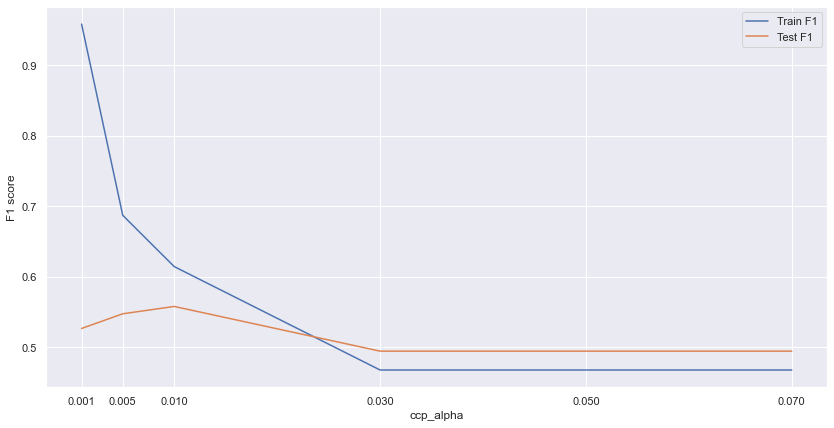

In [164]:
# Plot f1 score train dan test
alphas = [0.001,0.005,0.01,0.03,0.05,0.07]
f1_train = []
f1_test = []
for i in alphas:
    tree=RandomForestClassifier(ccp_alpha=i,max_features=grid.best_params_['max_features'],random_state=27)
    f1_train_score = modelfit(tree,X_train_ready2,y_train_ready2,X_test_ready,y_test)[0]
    f1_test_score = modelfit(tree,X_train_ready2,y_train_ready2,X_test_ready,y_test)[1]
    f1_train.append(f1_train_score)
    f1_test.append(f1_test_score)
   
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train,x=alphas,label="Train F1")
sns.lineplot(y=f1_test,x=alphas,label="Test F1")
plt.xticks(alphas)
plt.xlabel('ccp_alpha')
plt.ylabel('F1 score')
plt.show()

Dapat kita lihat disini bahwa nilai ccp_alpha 0.01 membuat f1 score train dan test hampir sama. Namun di sisi lain f1 score test drop secara signifikan. walaupun perpotongan kedua f1 score terjadi sekitar 0.02 value ccp_alpha, namun terjadi penurunan f1score yang cukp dipertimbangkan baik pada test dan train.

Kita dapat mendefinisikan model Random Forest dengan value hyperparameter terbaik yang didapat beserta tanpa set parameter.

In [165]:
model_rf_tuning = RandomForestClassifier(ccp_alpha=0.01, max_features=grid.best_params_['max_features'], random_state=27)
model_rf = RandomForestClassifier(random_state=27)

# 7 - Model Training

Pada proses ini akan dilakukan fit dan predict dari model Random Forest yang sudah di set hyperparameternya dan Random Forest dengan default parameter.

In [166]:
#Fit both model
model_rf.fit(X_train_ready2,y_train_ready2)
model_rf_tuning.fit(X_train_ready2,y_train_ready2)

RandomForestClassifier(ccp_alpha=0.01, random_state=27)

Hasil dari prediksi kedua model.

In [167]:
#Predict without tuning hyperparameter
y_pred_train = model_rf.predict(X_train_ready2)
y_pred_test = model_rf.predict(X_test_ready)

#Predict with tuning hyperparameter
y_pred_train_tuning = model_rf_tuning.predict(X_train_ready2)
y_pred_test_tuning = model_rf_tuning.predict(X_test_ready)

# 8 - Model Evaluation

Pada langkah ini akan kita akan mengevaluasi hasil dari prediksi kedua model Random Forest baik yang belum dan yang sudah dilakukan tuning hyperparameter.

Cek score pada model yang tidak dilakukan tuning hyperparameter.

In [168]:
print(classification_report(y_train_balance2,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1165
           1       1.00      1.00      1.00      1107

    accuracy                           1.00      2272
   macro avg       1.00      1.00      1.00      2272
weighted avg       1.00      1.00      1.00      2272

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       465
           1       0.50      0.52      0.51       126

    accuracy                           0.79       591
   macro avg       0.68      0.69      0.69       591
weighted avg       0.79      0.79      0.79       591



Cek jumlah false dan true prediction pada data test dengan confussion matrix.

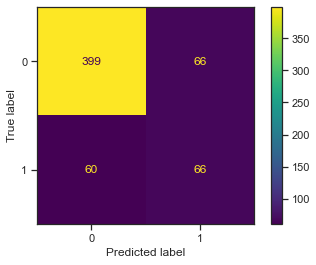

In [169]:
sns.set_style("ticks")
cm = confusion_matrix(y_test,y_pred_test)
ConfusionMatrixDisplay(cm).plot()

Kita dapat melihat bahwa semua score data train tanpa hyperparameter adalah 1, yang sangat berbeda dari test score. Jelas nampak terjadi **over-fit**.

Selanjutnya kita akan evaluasi hasil dari Random Forest dengan tuning hyperparameter.

In [170]:
print(classification_report(y_train_balance2,y_pred_train_tuning))
print(classification_report(y_test,y_pred_test_tuning))

              precision    recall  f1-score   support

           0       0.65      0.90      0.76      1165
           1       0.82      0.49      0.61      1107

    accuracy                           0.70      2272
   macro avg       0.74      0.70      0.68      2272
weighted avg       0.74      0.70      0.69      2272

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       465
           1       0.61      0.52      0.56       126

    accuracy                           0.83       591
   macro avg       0.74      0.71      0.72       591
weighted avg       0.82      0.83      0.82       591



Cek jumlah false dan true prediction pada data test dengan confussion matrix.

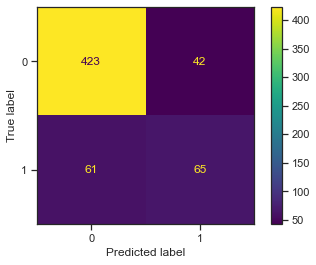

In [171]:
cm_tuning = confusion_matrix(y_test,y_pred_test_tuning)
ConfusionMatrixDisplay(cm_tuning).plot()

Terlihat bahwa jumlah true positive(kelas 1) dan false negative test random forest tanpa tuning yaitu 66 dan 60. Yang mana sangat tidak jauh berbeda dibanding hasil model dengan tuning yaitu 65 (true positive) dan 61 (false negative). Namun perbedaannya disini adalah berkurangnya jumlah false positive yang cukup signifikan dari hasil tanpa tuning (66) ke hasil dengan tuning (42). Apabila kita lihat dari semua score precision, recall dan f1 score dengan model random forest tuning hyperparameter lebih besar dibanding tanpa tuning hyperparameter. Namun keunggulan pada model yang dilakukan tuning hyperparameter adalah tidak se-overfit dibanding model random forest default (tanpa tuning).

Kita dapat membandingkan auc (area under curve) pada ROC curve pada hasil prediksi test data dari kedua model.

In [172]:
#Probability for data test
proba = model_rf.predict_proba(X_test_ready)
proba_tuning = model_rf_tuning.predict_proba(X_test_ready)

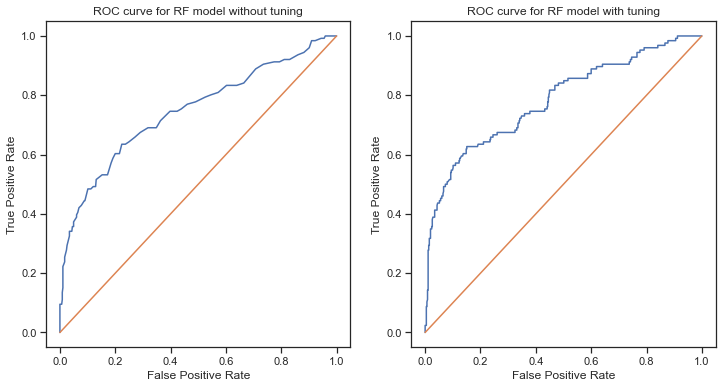

0.7457501280081925
0.7828810377197474


In [173]:
# ROC curve pada model Random Forest tanpa tuning
fpr, tpr, thresholds = roc_curve(y_test, proba[:,1])
fpr_, tpr_, thresholds_ = roc_curve(y_test, proba_tuning[:,1])
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for RF model without tuning")

plt.subplot(1,2,2)
plt.plot(fpr_,tpr_)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for RF model with tuning")
plt.show()
print(roc_auc_score(y_test,proba[:,1]))
print(roc_auc_score(y_test,proba_tuning[:,1]))

Score AUC model Random Forest dengan tuning hyperparameter yaitu sekitar 0.78, yang mana sedikit lebih besar dari AUC score model tanpa tuning yaitu 0.75.

# 9 - Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set, yakni data inference. 

In [174]:
X_inf = data_inf.drop('dpnm', axis = 1)
y_inf = data_inf['dpnm']

In [175]:
# Hasil prediksi data inference dari kedua model Random Forest
y_pred_inf = model_rf.predict(preprocess.transform(X_inf))
y_pred_inf_tuning = model_rf_tuning.predict(preprocess.transform(X_inf))

Karena hanya sedikit jumlah data inference, kita bisa langsung menampilkan value target aktual beserta hasil prediksi kedua model dalam dataframe sebagai berikut.

In [176]:
inf_prediction = pd.DataFrame({'dpnm':y_inf,'predict':y_pred_inf,'predict with tuning':y_pred_inf_tuning})
inf_prediction

,dpnm,predict,predict with tuning
0,0,0,0
1,1,1,1
2,0,0,0
3,0,0,0
4,0,0,0
5,1,0,0
6,1,0,0
7,0,0,0
8,0,1,1
9,1,1,1


Dapat dilihat kedua model dapat memprediksi dengan lancar, tidak ada error dan tidak ada value prediksi di luar dugaan (seperti value di atas 1, atau negative value).

# 10 - Kesimpulan

Prediksi target default payment next month pada awalnya dilakukan dengan menerapkan 7 model dengan default parameter yaitu:
- Logistic Regression
- Support Vector Classification (SVC)
- Decision Tree
- Random Forest
- K-Nearest Neighbors (KNN)
- Naive Bayes
- XGBoost Classifier

Dari ketujuh model tersebut dilakukan proses cross validation dengan acuan f1 score, dikarenakan data tergolong imbalanced data. Berdasarkan mean dan standard deviation dan pertimbangan parameter yang terkandung dalam model tersebut, dipilih model **Random Forest** sebagai model terbaik. Dikarenakan mean f1 score cross validation Random Forest adalah yang terbesar yaitu sekitar 0.8, dengan standard deviationnya yang cukup kecil dibanding model yang lain yaitu 0.02. 

Model Random forest tanpa tuning maupun dengan tuning, keduanya memiliki kemampuan prediksi yang baik pada prediksi kelas major dpnm 0, namun tidak begitu baik pada kelas minor dpnm 1. Model Random Forest default terjadi *over-fit* berdasarkan score accuracy, precision, recall, dan f1 score test yang lebih rendah daripada scores data train. 

Model Random Forest dengan tuning hyperparameter terlihat lebih mampu mengurangi false positive target kelas 1 dibanding tanpa tuning, hal tersebut dapat dilihat dari false predict kelas 0 yang semakin berkurang dan true predict kelas 1 yang semakin meningkat. Secara keseluruhan baik dari overfit atau tidaknya, dan score precision, recall, dan f1 score model dengan tuning lebih baik dari mdoel random forest default.

Model tersebut mungkin dapat ditingkatkan lagi dengan dilakukan dengan berbagai eksperiman tuning hyperparameter. Selain itu mungkin terdapat pengaruh dari hasil oversampling yang kita lakukan, dimana bisa jadi output oversampling tersebut kurang representatif pada data aktual, yang mana bisa mengakibatkan kurangnya model dalam mempelajari kelas tersebut. Selain itu masih terdapat banyak outliers pada features pay_amt dan bill_amt yang bisa berperan dalam performa yang dilakukan disini.

# QUESTIONS

## 1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

Decision Tree melakukan prediksi dengan membuat node berdasarkan suatu feature yang dapat memberikan opsi dalam mengklasifikasi input yang diberikan. Biasanya decision tree dimulai dari satu node kemudian node tersebut bercabang untuk memberikan pilihan-pilihan Tindakan yang lain atau disebut splitting nodes berdasarkan suatu feature. **Criterion** merupakan suatu aturan dalam melakukan proses splitting nodes tersebut. Terdapat beberapa jenis criterion dalam splitting nodes, yaitu *Gini impurity*, *Entropy*, dan *Information gain*.

Gini merupakan nilai peluang benar dalam pengelompokkan suatu random input apabila input tersebut apabila diberikan input tersebut memenuhi kriteria pada node. Secara matematis dapat ditulis:
$\begin{equation}Gini=\displaystyle\sum_{i=1} ^{n} p^2_{i} \end{equation}$

Dimana $p_i$ merupakan proporsi input pada label $i$. Sedangkan gini impurity adalah :
$\begin{equation}Gini Impurity=1-Gini\end{equation}$

Semakin rendah nilai gini impurity suatu feature maka akan semakin homogen node feature tersebut. Nilai 0 pada gini impurity menandakan pure node pada suatu feature.

## 2. Apakah fungsi dari pruning pada Tree model?

Pruning merupakan suatu teknik pemangkasan size decision tree dengan cara remove tree atau nodes yang berujung pada leaf node dengan jumlah sample yang sedikit, dimana hal tersebut akan membuat klasifikasi menjadi sangat baik pada input tersebut namun untuk input data baru yang mungkin sedikit berbeda dapat menghasilkan salah klasifikasi atau dapat dikatakan model menjadi over-fit. Dengan melakukan teknik pruning akan menurunkan kecendrungan overfit pada model decision tree .

## 3. Bagaimana cara memilih K yang optimal pada KNN?

Pada classification model K value pada KNN merupakan jumlah point terdekat terhadap suatu input point, dimana mayoritas kelas pada k point terdekat tersebut akan menjadi kelas untuk input point. Karena perhitungan distance menjadi pertimbangan pada penenuan kelas, maka ada baiknya dilakukan feature scaling dan handling outliers. Dalam K yang rendah jelas nampak sensitif terhadap outliers, sedangkan K yang semakin tinggi akan semakin resilient pada outliers karena jumlah voter K yang besar.

Untuk menentukan value K yang tepat, sebaiknya dilakukan cross validation pada beberapa values K dan memilih value K yang terbaik dan tidak mengalami model menjadi over-fit. Adapun terdapat teknik *rule of thumb* dimana nilai K yang mungkin cocok digunakan adalah $k=\sqrt{n}$, dimana n adalah jumlah sample. Aturan ini dikatakan cocok untuk jumlah sample yang banyak dibandingkan jumlah featurenya. Bisa juga digunakan cross validation dengan memasukkan $k=\sqrt{n}$ ke dalam list k yang akan diujikan.

## 4. Jelaskan apa yang kalian ketahui tentang Cross Validation

Cross validation merupakan suatu metode resampling pada data, dimana diambil sebagian porsi data untuk train dan test lalu dilakukan  pencarian score yang ditetapkan pada suatu model. Misal apabila kita set $k=10$, maka akan dilakukan resampling 10 kali dengan hasil resampling train test yang berbeda pada tiap percobaannya. Dimana tiap percobaan model akan dilakukan fit pada porsi train, dan dilakukan pengukuran score pada porsi train, proses ini dilakukan terus menerus dan didapatkan variasi score yang berbeda. Proses cross validation dilakukan untuk mengevaluasi akurasi suatu model dengan mempertimbangkan rata-rata ataupun standar deviasi dari sejumlah score yang didapat, yang mana bisa jadi model tersebut dapat dikembangkan dengan mengatur parameter yang berbeda pada model tersebut.

## 5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score

Accuracy merupakan perbandingan banyaknya prediksi yang tepat terhadap total data.

Precision merupakan perbandingan banyaknya prediksi positive kelas yang tepat terhadap jumlah yang diprediksi positive.

Recall atau True Positive Rate merupakan perbandingan banyaknya prediksi positive kelas yang tepat terhadap jumlah aktual positive kelas.

F1 score merupakan harmonic mean dari precision dan recall. F1 score bisa digunakan untuk membandingkan dua model terhadap precision dan recall. Misalkan model A mempunyai precision yang besar, sedangkan model B mempunyai recall yang besar. Kita dapat membandingkan f1 score pada kedua model tersebut. F1 score didominasi oleh value yang lebih kecil(sesuai konsep harmonic mean) baik pada precision maupun recall. F1 score juga biasa digunakan sebagai metrics score pada klasifikasi imbalanced data.